<a href="https://colab.research.google.com/github/Meenu2204/Feynnlabs_EV_Market/blob/main/Model_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
df1 = pd.read_excel('charging-stations (1).xlsx')
     

In [3]:
df1.replace("Andaman & Nicobar", "Andaman and Nicobar Islands", inplace=True)
df1.replace("Jammu & Kashmir", "Jammu and Kashmir", inplace = True)
df1.head()

,State Name,No.of Operational Public Charging Stations
0,Andaman and Nicobar Islands,3
1,Andhra Pradesh,222
2,Arunachal Pradesh,9
3,Assam,48
4,Bihar,83


In [5]:
df2 = pd.read_csv('States_data_evs.csv')
df2.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


In [8]:
df = pd.merge(left=df1, right=df2, how='left', left_on='State Name', right_on='State')
df.head()

,State Name,No.of Operational Public Charging Stations,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,Andaman and Nicobar Islands,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,222,20.0,Andhra Pradesh,431.0,692.0,4689.0,0.0,0.0,3680.0,0.0,9492.0
2,Arunachal Pradesh,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Assam,48,11.0,Assam,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0
4,Bihar,83,13.0,Bihar,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0


In [9]:
df.to_csv('Merged_EV.csv')

In [12]:
df = df.drop('State Name', axis = 1)
df.head()

,No.of Operational Public Charging Stations,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,222,20.0,431.0,692.0,4689.0,0.0,0.0,3680.0,0.0,9492.0
2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,11.0,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0
4,83,13.0,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0


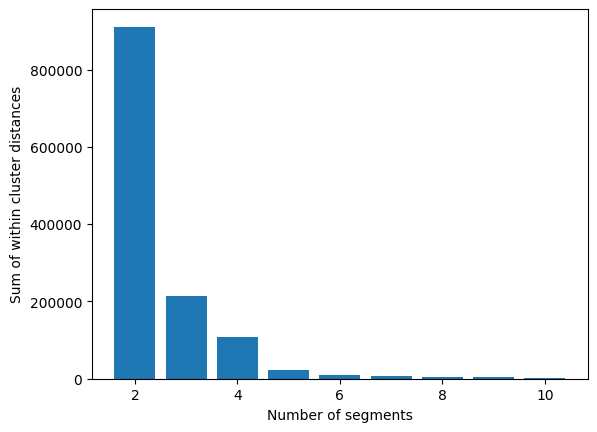

In [30]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
distortions = []
for k in range(2,11):
    kmeanModel = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeanModel.fit(df[['No.of Operational Public Charging Stations']].dropna())
    distortions.append(kmeanModel.inertia_)
plt.bar(range(2,11), distortions)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within cluster distances')
plt.show()
     


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

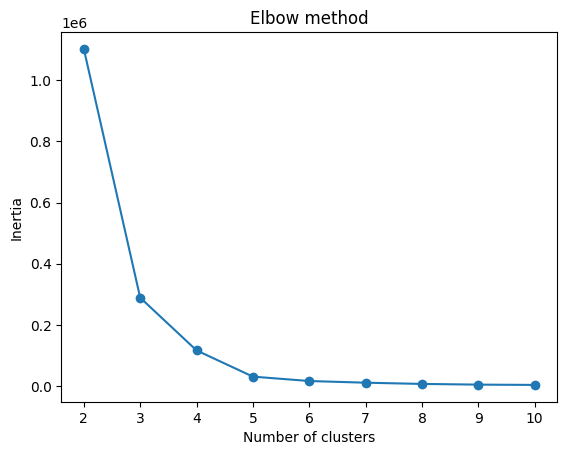

In [17]:
inertias = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['No.of Operational Public Charging Stations']].dropna())
    inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[['No.of Operational Public Charging Stations']].dropna())
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
df = df.dropna()
df.head()

,No.of Operational Public Charging Stations,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
1,222,20.0,431.0,692.0,4689.0,0.0,0.0,3680.0,0.0,9492.0
3,48,11.0,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0
4,83,13.0,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0
5,6,12.0,612.0,18.0,896.0,0.0,0.0,974.0,0.0,2500.0
6,46,16.0,613.0,382.0,2078.0,58.0,106.0,997.0,0.0,4234.0


In [27]:
len('labels')

6